# Sharks attacks

In [1]:
# modules import
import re
import pandas as pd
import matplotlib.pyplot as plt
from src.functions import sex_filter,fatal_filter,space_cleaner,age_cleaner,integer

In [2]:
# Database import from Kaggle's csv

data = pd.read_csv("./input/GSAF5.csv",encoding='cp1252')

df = pd.DataFrame(data)
df = df[["Year","Country","Activity","Sex ","Age","Fatal (Y/N)"]]

df.head()

,Year,Country,Activity,Sex,Age,Fatal (Y/N)
0,2016,USA,Surfing,M,16,N
1,2016,USA,Surfing,M,36,N
2,2016,USA,Surfing,M,43,N
3,2016,AUSTRALIA,Surfing,M,NaN,N
4,2016,AUSTRALIA,Surfing,M,NaN,N


In [3]:
# Checking nulls

null_cols = df.isnull().sum()
null_cols
null_cols[null_cols > 0]

Country          43
Activity        527
Sex             567
Age            2681
Fatal (Y/N)      19
dtype: int64

In [4]:
#Columns data types

print(df.dtypes)

Year            int64
Country        object
Activity       object
Sex            object
Age            object
Fatal (Y/N)    object
dtype: object


In [5]:
# Filtering by year (1900-2016)

df = df[(df["Year"]>= 1900)]

#number of values matching the report range

print("There are ",df.shape[0]," results.")

There are  5324  results.


In [6]:
# Fixing the name of the columns "Sex", it has an extra space at the end.

df = df.rename(columns={"Sex ":"Sex"})

# Cleaning the "Sex" column

df["Sex"]= df["Sex"].fillna("Unknown")
df["Sex"] = df["Sex"].apply(sex_filter)
print(df["Sex"].value_counts().sort_values(ascending = False))

M          4268
F           548
Unknown     508
Name: Sex, dtype: int64


In [7]:
# Distribution of sharks attacks by sex of the victim

sex_table = df[["Sex","Year"]]
sex_table = sex_table.rename(columns={"Year":"Count"})
sex_table = sex_table[(sex_table["Sex"] != "Unknown")]
sex_table = sex_table.groupby(["Sex"]).count()
sex_table = sex_table.sort_values(by = ["Count"],ascending = False)
sex_table.head(5)

,Count
Sex,
M,4268
F,548


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


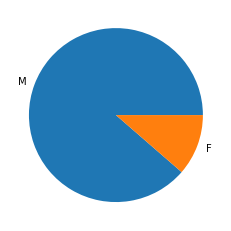

In [8]:
#pie graph for sharks attacks by sex

sex_labels = ["M","F"]
plt.pie(sex_table,labels = sex_labels)
plt.show()

In [9]:
# Renaming the "fatal" column 

df = df.rename(columns={"Fatal (Y/N)":"Fatal"})

# Cleaning "fatal" column

df["Fatal"]= df["Fatal"].fillna("Unknown")
df["Fatal"] = df["Fatal"].apply(fatal_filter)
print(df["Fatal"].value_counts().sort_values(ascending = False))

N          4036
Y          1203
Unknown      85
Name: Fatal, dtype: int64


In [10]:
# Distribution of sharks attacks by fatal

fatal_table = df[["Fatal","Year"]]
fatal_table = fatal_table.rename(columns={"Year":"Count"})
fatal_table = fatal_table[(fatal_table["Fatal"]!= "Unknown")]
fatal_table = fatal_table.groupby(["Fatal"]).count()
fatal_table = fatal_table.sort_values(by = ["Count"],ascending = False)

fatal_table.head(5)

,Count
Fatal,
N,4036
Y,1203


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


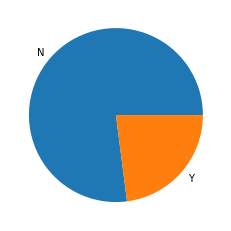

In [11]:
#pie graph for sharks attacks by fatals

fatal_labels = ["N","Y"]
plt.pie(fatal_table,labels = fatal_labels)
plt.show()

In [12]:
# Cleaning "Country" column

df["Country"]= df["Country"].fillna("Unknown")
df["Country"] = df["Country"].apply(space_cleaner)
print(df["Country"].value_counts().sort_values(ascending = False))

USA                           1992
AUSTRALIA                     1124
SOUTH AFRICA                   535
PAPUA NEW GUINEA               129
BRAZIL                         100
                              ... 
URUGUAY                          1
BRITISH VIRGIN ISLANDS           1
Seychelles                       1
IRELAND                          1
ANDAMAN / NICOBAR ISLANDAS       1
Name: Country, Length: 168, dtype: int64


In [13]:
# Distribution of sharks attacks by country

country_table = df[["Country","Year"]]
country_table = country_table.rename(columns={"Year":"Count"})
country_table = country_table[(country_table["Country"]!= "Unknown")]
country_table = country_table.groupby(["Country"]).count()
country_table = country_table.sort_values(by = ["Count"],ascending = False)

country_table.head(5)

,Count
Country,
USA,1992
AUSTRALIA,1124
SOUTH AFRICA,535
PAPUA NEW GUINEA,129
BRAZIL,100


In [14]:
# Cleaning "age" column

df["Age"]= df["Age"].fillna("Unknown")
df["Age"] = df["Age"].apply(age_cleaner)

set(df["Age"])
print(df["Age"].value_counts().sort_values(ascending = False))

Unknown    2113
17          143
18          139
20          133
16          132
           ... 
12            1
14            1
17            1
7             1
0             1
Name: Age, Length: 113, dtype: int64


In [15]:
# Mean age of the victim

age_table = df[(df["Age"]!= "Unknown")]
age_table["Age"] = age_table["Age"].apply(integer)
print(round(age_table["Age"].mean(),2))

27.22


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
# Distribution of sharks attacks by age of the victim

age_table = df[["Age","Year"]]
age_table = age_table.rename(columns={"Year":"Count"})
age_table = age_table[(age_table["Age"]!= "Unknown")]
age_table = age_table.groupby(["Age"]).count()
age_table = age_table.sort_values(by = ["Count"],ascending = False)

age_table.head(5)

,Count
Age,
17,143
18,139
20,133
16,132
19,132


In [17]:
#Cleaning the "activity" column

df["Activity"]= df["Activity"].fillna("Unknown")
set(df["Activity"])
lst = []

for e in df["Activity"]:
    if re.search(r"surf|Surf",e):
        e = "Surfing"
        lst.append(e)
    elif re.search(r"swim|Swim",e):
        e = "Swimming"
        lst.append(e)
    elif re.search(r"fishi|Fishi",e):
        e = "Fishing"
        lst.append(e)
    elif re.search(r"Unknown",e):
        e = "Unknown"
        lst.append(e)
    else:
        e = "Other"
        lst.append(e)        
      
df["Activity"] = lst

activity_table = df[["Activity","Year"]]
activity_table = activity_table.rename(columns={"Year":"Count"})
activity_table = activity_table[(activity_table["Activity"]!= "Unknown")]
activity_table = activity_table.groupby(["Activity"]).count()
activity_table = activity_table.sort_values(by = ["Count"],ascending = False)

activity_table.head(5)

,Count
Activity,
Other,1780
Surfing,1180
Fishing,1020
Swimming,914


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


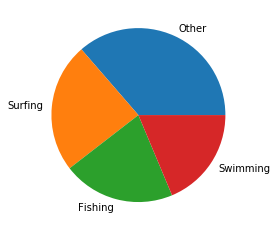

In [18]:
# Distribution of sharks attacks by activity

activity_labels = ["Other","Surfing","Fishing","Swimming"]
plt.pie(activity_table,labels = activity_labels)
plt.show()

In [19]:
#Cleaned data frame

df = df[["Year","Country","Sex","Age","Activity","Fatal"]]
display(df)

,Year,Country,Sex,Age,Activity,Fatal
0,2016,USA,M,16,Surfing,N
1,2016,USA,M,36,Surfing,N
2,2016,USA,M,43,Surfing,N
3,2016,AUSTRALIA,M,Unknown,Surfing,N
4,2016,AUSTRALIA,M,Unknown,Surfing,N
...,...,...,...,...,...,...
5320,1900,USA,M,Unknown,Other,Y
5321,1900,USA,Unknown,Unknown,Other,N
5322,1900,AUSTRALIA,M,Unknown,Other,N
5323,1900,USA,M,Unknown,Unknown,N


In [20]:
# Export to csv
#df.to_csv("sharksattacks.csv")